In [1]:
import os

import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import torch_geometric as pyg
# enable multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pyg.seed.seed_everything(1234)

In [2]:
%qtconsole

In [3]:
%cd /Users/cgu3/Documents/Grape-Pi
%pwd

/Users/cgu3/Documents/Grape-Pi


/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/Grape-Pi'

In [210]:
# by default it save trained model in results/config/1234/ckpt
!python grape_pi.py --cfg saved_results/gastric_sageconv/config.yaml --threshold 0.9 --num-promoted 100 --output saved_results/gastric_sageconv/evaluation
# 
# !python grape_pi.py --cfg saved_results/gastric_sageconv/config.yaml --checkpoint results/config/1234/ckpt/epoch=199-step=19200.ckpt --threshold 0.9 --num-promoted 100 --output saved_results/gastric_sageconv/evaluation

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/gastric_all_data
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_

In [238]:
all_proteins_df = pd.read_csv('saved_results/gastric_sageconv/evaluation/all_proteins.csv')
all_proteins_df

,accession,pred_prob,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol,mRNA_TPM,hard_label_04_06,hard_label_03_07,hard_label_02_08
0,A0A024RBG1,0.952841,A0A024RBG1,0.890032,0.667430,NUDT4B,0.0000,1.0,NaN,NaN
1,A0A075B6H7,0.568539,A0A075B6H7,0.700122,0.267383,IGKV3-7,0.0000,0.0,0.0,NaN
2,A0A075B6H8,0.233078,A0A075B6H8,0.286947,0.056265,IGKV1D-42,0.0000,0.0,0.0,0.0
3,A0A075B6L6,0.972103,A0A075B6L6,0.943529,0.140940,TRBV7-3,0.0000,0.0,0.0,0.0
4,A0A075B6N1,0.234861,A0A075B6N1,0.289680,0.153119,TRBV19,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20421,Q9UI54,0.112813,Q9UI54,0.000000,0.000000,0,0.0000,0.0,0.0,0.0
20422,Q9Y3F1,0.112813,Q9Y3F1,0.000000,0.197423,0,0.0000,0.0,0.0,0.0
20423,Q9Y6C7,0.112813,Q9Y6C7,0.000000,0.093179,LINC00312,0.0000,0.0,0.0,0.0
20424,Q9Y6Z2,0.112813,Q9Y6Z2,0.000000,0.000000,LINC01558,0.0531,0.0,0.0,0.0


In [239]:

# combine the test_proteins_df with the original protein data

all_proteins_df = all_proteins_df.loc[:, ['accession', 'gene_symbol', 'pred_prob', 'protein_probability', 'protein_probability_soft_label', "hard_label_03_07", 'mRNA_TPM''']]
# rename
all_proteins_df = all_proteins_df.rename(columns={'protein_probability': 'raw_prob', 'protein_probability_soft_label': 'soft_label', 'hard_label_03_07': 'hard_label', 'mRNA_TPM': 'mRNA'})
all_proteins_df.to_csv('/Users/cgu3/Documents/Grape-Pi/notebooks/post_training_evaluation/results/gastric_all_proteins_df.csv')

# filter only keep soft_label between 0.3 and 0.7
test_proteins_df = all_proteins_df[(all_proteins_df['soft_label'] > 0.3) & (all_proteins_df['soft_label'] < 0.7)]

confident_protein = test_proteins_df[(test_proteins_df['raw_prob'] >= 0.9)]['accession']
test_proteins_df = test_proteins_df[(test_proteins_df['raw_prob'] < 0.9)]

In [240]:
# may be only use raw_prob between 0.3 and 0.7 and check how many of them are predicted to be positive by the model ;)


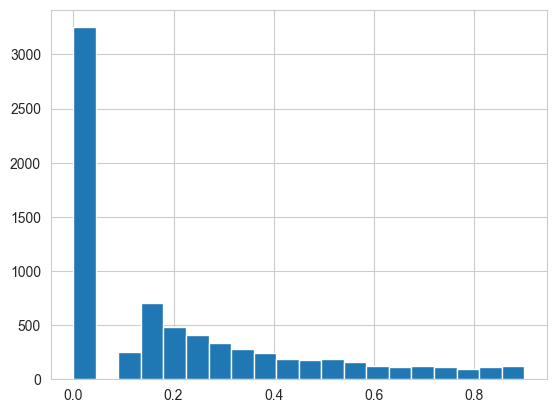

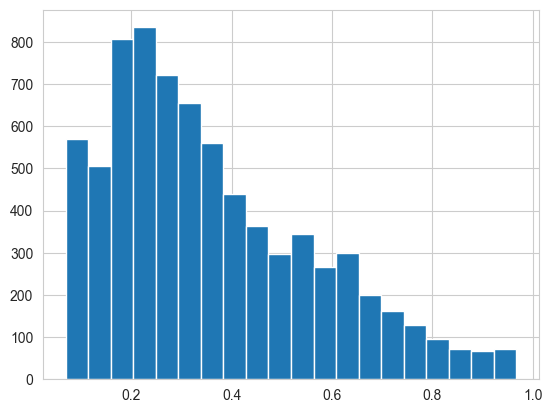

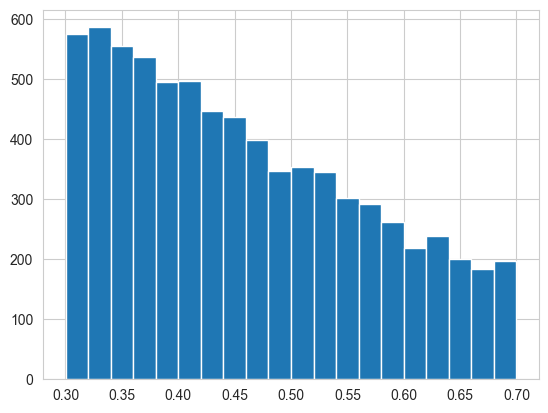

In [241]:
# plot his of raw_prob
import matplotlib.pyplot as plt
_ = plt.hist(test_proteins_df['raw_prob'], bins=20),
plt.show()
_ = plt.hist(test_proteins_df['pred_prob'], bins=20),
plt.show()
_ = plt.hist(test_proteins_df['soft_label'], bins=20),
plt.show()

In [242]:
# check the proportion of protein with mRNA > 0
len(test_proteins_df[test_proteins_df['mRNA'] > 0]) / len(test_proteins_df)

# check proportion of protein with mRNA > 0 in the positive_by_raw
# len(positive_by_raw[positive_by_raw['mRNA'] > 0]) / len(positive_by_raw)

0.8698098044468257

In [243]:
pred_prob_preded_mRNA_coverage = []
raw_prob_preded_mRNA_coverage = []
for N in range(100, 7500, 100):
    # get index of column pred_prob
    
    pred_cutoff = test_proteins_df.sort_values(by='pred_prob', ascending=False).reset_index(drop=True).iloc[N, 
    test_proteins_df.columns
    .get_loc('pred_prob')]
    # get cutoff when the first 100 proteins are predicted to be positive by raw_prob
    raw_cutoff = test_proteins_df.sort_values(by='raw_prob', ascending=False).reset_index(drop=True).iloc[N, 
    test_proteins_df.columns
    .get_loc('raw_prob')]
    # slice the dataframe by the pred_cutoff
    positive_by_pred = test_proteins_df[test_proteins_df['pred_prob'] > pred_cutoff]
    # slice the dataframe by the raw_cutoff
    positive_by_raw = test_proteins_df[test_proteins_df['raw_prob'] > raw_cutoff]
    # check proportion of protein with mRNA > 0 in the positive_by_pred
    pred_prob_preded_mRNA_coverage.append(len(positive_by_pred[positive_by_pred['mRNA'] > 0]) / len(positive_by_pred))
    # check proportion of protein with mRNA > 0 in the positive_by_raw
    raw_prob_preded_mRNA_coverage.append(len(positive_by_raw[positive_by_raw['mRNA'] > 0]) / len(positive_by_raw))

In [244]:
pred_prob_preded_mRNA_coverage[4]
raw_prob_preded_mRNA_coverage[4]

0.936

0.884

In [245]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_protein_data(result, label_col, unconfident_threshold):
    dat = pd.read_csv(result)
    dat = dat.loc[:, ['accession', 'gene_symbol', 'pred_prob', 'protein_probability', label_col, 'mRNA_TPM']]
    dat.rename(columns={'protein_probability': 'raw_prob', 'mRNA_TPM': 'mRNA'}, inplace=True)
    output_dir = os.path.dirname(result)
    output = os.path.join(output_dir, 'mRNA_coverage.tiff')

    dat = dat[dat[label_col].isnull()]
    dat = dat[(dat['raw_prob'] < unconfident_threshold)]
    dat['mRNA'] = dat['mRNA'].apply(lambda x: 1 if x > 0 else 0)

    pred_prob_preded_mRNA_coverage = []
    raw_prob_preded_mRNA_coverage = []
    for N in range(100, dat.shape[0], 1):
        positive_by_pred = dat.sort_values(by='pred_prob', ascending=False).reset_index(drop=True).iloc[:N, dat.columns.get_loc('mRNA')]
        positive_by_raw = dat.sort_values(by='raw_prob', ascending=False).reset_index(drop=True).iloc[:N, dat.columns.get_loc('mRNA')]

        pred_prob_preded_mRNA_coverage.append(np.sum(positive_by_pred) / len(positive_by_pred))
        raw_prob_preded_mRNA_coverage.append(np.sum(positive_by_raw) / len(positive_by_raw))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(pred_prob_preded_mRNA_coverage)
    ax.plot(raw_prob_preded_mRNA_coverage)
    ax.set_xlabel('Number of proteins predicted to be positive')
    ax.set_xlim(0, dat.shape[0])
    ax.set_xticks(range(0, dat.shape[0], 500))
    ax.set_ylabel('Proportion of proteins with detected corresponding mRNA')
    plt.legend(['Predicted protein probability', 'Raw protein probability'])
    plt.show()
    fig.savefig(output, format='tiff', dpi=350, bbox_inches='tight')

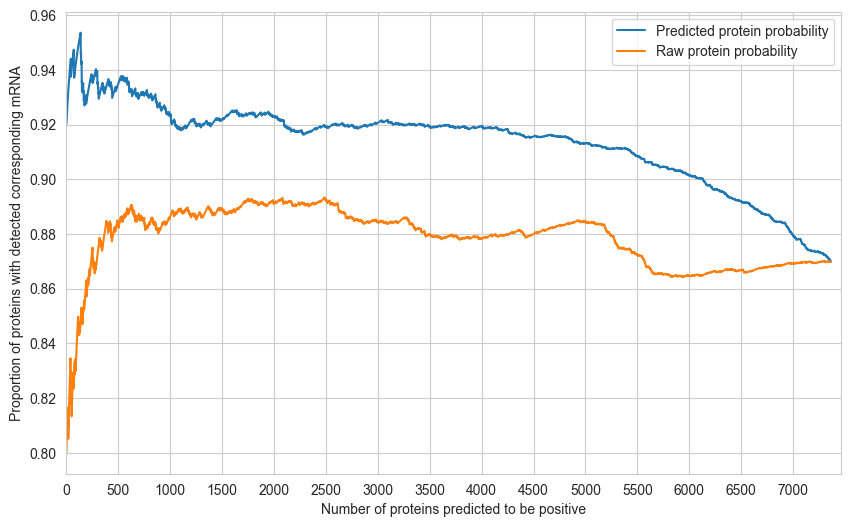

In [246]:
analyze_protein_data('saved_results/gastric_sageconv/evaluation/all_proteins.csv', 'hard_label_03_07', 0.9)

In [247]:
# all_proteins_df
mRNA_coverage = []
for N in range(200, 19000, 100):
    raw_cutoff = all_proteins_df.sort_values(by='raw_prob', ascending=False).reset_index().iloc[N, 4]
    # slice the dataframe by the raw_cutoff
    positive_by_raw = all_proteins_df[all_proteins_df['raw_prob'] > raw_cutoff]
    # check proportion of protein with mRNA > 0 in the positive_by_raw
    mRNA_coverage.append(len(positive_by_raw[positive_by_raw['mRNA'] > 0]) / len(positive_by_raw))

In [248]:
# count number of proteins with raw_prob > 0.9
len(all_proteins_df[all_proteins_df['raw_prob'] > 0.9])

2976

Text(0.5, 0, 'Number of proteins predicted to be positive')

(1.0, 75.0)

Text(0, 0.5, 'Proportion of proteins with detected corresponding mRNA expression')

Text(30, 0.885, 'positive proteins using \n raw protein probability \n cutoff at 0.9')

Text(0.5, 1.0, 'Proportion of proteins with detected corresponding mRNA \n in the proteins predicted to be positive by raw protein probability')

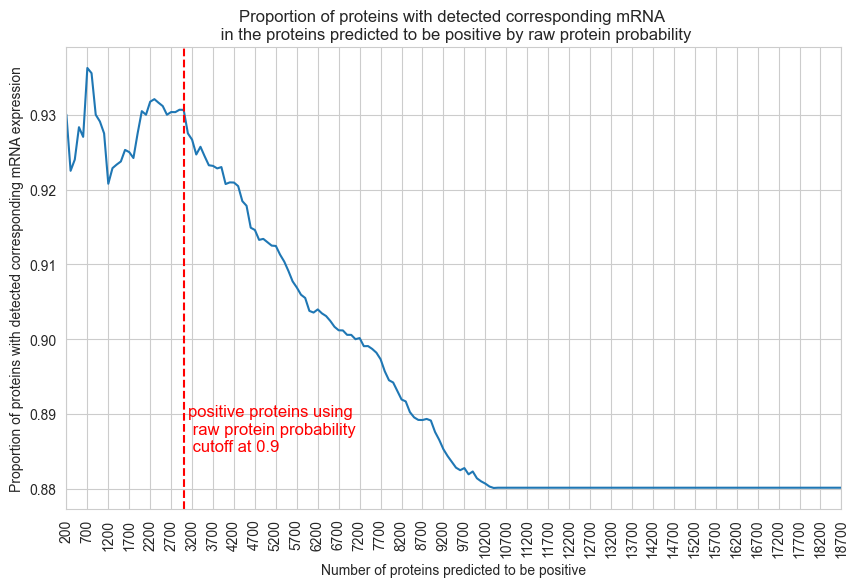

In [249]:
# scatter plot pred_prob_preded_mRNA_coverage and raw_prob_preded_mRNA_coverage
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6));
ax.plot(mRNA_coverage);
# x axis range
ax.set_xlabel('Number of proteins predicted to be positive');
# plot 50, 100, until 7500 in x-axis
ax.set_xlim(1, 75);
ax.set_xticks(range(1, 190, 5), labels=range(200, 19000, 500), rotation=90);
# ax.set_ylim(0.85, 1);
ax.set_ylabel('Proportion of proteins with detected corresponding mRNA expression');
# plot a vertical line at 3000
plt.axvline(x=29, color='red', linestyle='--')
# plot a legend for the vertical line
plt.text(30, 0.885, 'positive proteins using \n raw protein probability \n cutoff at 0.9', fontsize=12, color='red')
# add title
plt.title('Proportion of proteins with detected corresponding mRNA \n in the proteins predicted to be positive by raw protein probability')
plt.show()

In [250]:
### Each dot is a protein, X-axis the 

In [251]:
# output the dataframe to a csv file
test_proteins_df.to_csv('/Users/cgu3/Documents/Grape-Pi/notebooks/post_training_evaluation/results/test_proteins.csv')
len(test_proteins_df)


7466

In [252]:
    # get cutoff when the first N proteins are predicted to be positive
N = 500
pred_cutoff = test_proteins_df.sort_values(by='pred_prob', ascending=False).reset_index().iloc[N, 3]
# get cutoff when the first 100 proteins are predicted to be positive by raw_prob
raw_cutoff = test_proteins_df.sort_values(by='raw_prob', ascending=False).reset_index().iloc[N, 4]
# slice the dataframe by the pred_cutoff
positive_by_pred = test_proteins_df[test_proteins_df['pred_prob'] > pred_cutoff]
# slice the dataframe by the raw_cutoff
positive_by_raw = test_proteins_df[test_proteins_df['raw_prob'] > raw_cutoff]

In [253]:
# filter raw_prob > 0.5
positive_by_raw_prob = test_proteins_df[test_proteins_df['raw_prob'] > raw_cutoff]
len(positive_by_raw_prob)
# fitler pred_prob > 0.5
positive_by_pred_prob = test_proteins_df[test_proteins_df['pred_prob'] > pred_cutoff]
len(positive_by_pred_prob)
# check overlap between the two sets
len(set(positive_by_raw_prob['accession']) & set(positive_by_pred_prob['accession']))

500

500

281

# check the proportion of mRNA for unique proteins in pred_prob

In [254]:
# check proportion of protein with mRNA > 0 in the positive_by_pred
mRNA_coverage = len(positive_by_pred_prob[positive_by_pred_prob['mRNA'] > 0]) / len(positive_by_pred_prob)
print('the mRNA coverage for identified proteins from pred prob', round(mRNA_coverage, 2))
# check proportion of protein with mRNA > 0 in the positive_by_raw
mRNA_coverage = len(positive_by_raw_prob[positive_by_raw_prob['mRNA'] > 0]) / len(positive_by_raw_prob)
print('the mRNA coverage for identified proteins from raw prob', round(mRNA_coverage, 2))
# check the proportion of mRNA for unique proteins in pred_prob
pred_prob_unique = set(positive_by_pred_prob['accession']) - set(positive_by_raw_prob['accession'])
raw_prob_unique = set(positive_by_raw_prob['accession']) - set(positive_by_pred_prob['accession'])
# filter the unique proteins in pred_prob
unique_pred_prob = test_proteins_df[test_proteins_df['accession'].isin(pred_prob_unique)]
# check the proportion of mRNA for unique proteins in pred_prob
mRNA_coverage = len(unique_pred_prob[unique_pred_prob['mRNA'] > 0]) / len(unique_pred_prob)
print('the mRNA coverage for uniquely identified proteins from pred prob', round(mRNA_coverage, 2))

# filter the unique proteins in raw_prob
unique_raw_prob = test_proteins_df[test_proteins_df['accession'].isin(raw_prob_unique)]
# check the proportion of mRNA for unique proteins in raw_prob
mRNA_coverage = round(len(unique_raw_prob[unique_raw_prob['mRNA'] > 0]) / len(unique_raw_prob), 2)
print('the mRNA coverage for uniquely identified proteins from raw prob', mRNA_coverage)

the mRNA coverage for identified proteins from pred prob 0.94
the mRNA coverage for identified proteins from raw prob 0.88
the mRNA coverage for uniquely identified proteins from pred prob 0.95
the mRNA coverage for uniquely identified proteins from raw prob 0.83


# Check probability threshold for raw_prob and pred_prob

<Figure size 1000x600 with 0 Axes>

(array([ 2.,  1.,  5.,  7., 15., 19., 22., 26., 22., 28., 29., 26., 40.,
        29., 30., 29., 20., 36., 52., 62.]),
 array([0.37375889, 0.40005391, 0.42634892, 0.45264393, 0.47893894,
        0.50523395, 0.53152897, 0.55782398, 0.58411899, 0.610414  ,
        0.63670901, 0.66300403, 0.68929904, 0.71559405, 0.74188906,
        0.76818407, 0.79447909, 0.8207741 , 0.84706911, 0.87336412,
        0.89965913]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Raw protein probability')

Text(0, 0.5, 'Number of proteins')

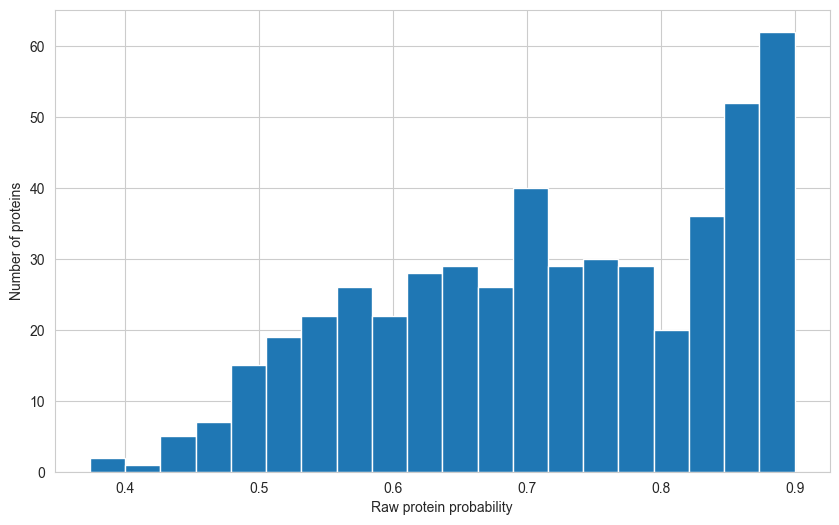

In [255]:
# plot raw_prob of unique_pred_prob
plt.figure(figsize=(10, 6))
plt.hist(positive_by_pred_prob['raw_prob'], bins=20)
plt.xlabel('Raw protein probability')
plt.ylabel('Number of proteins')
plt.show()

<Figure size 1000x600 with 0 Axes>

(array([31., 24., 23., 30., 25., 29., 26., 23., 20., 17., 23., 23., 26.,
        23., 22., 24., 26., 36., 21., 28.]),
 array([0.70042076, 0.71038268, 0.7203446 , 0.73030652, 0.74026844,
        0.75023035, 0.76019227, 0.77015419, 0.78011611, 0.79007803,
        0.80003995, 0.81000187, 0.81996378, 0.8299257 , 0.83988762,
        0.84984954, 0.85981146, 0.86977338, 0.8797353 , 0.88969721,
        0.89965913]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Raw protein probability')

Text(0, 0.5, 'Number of proteins')

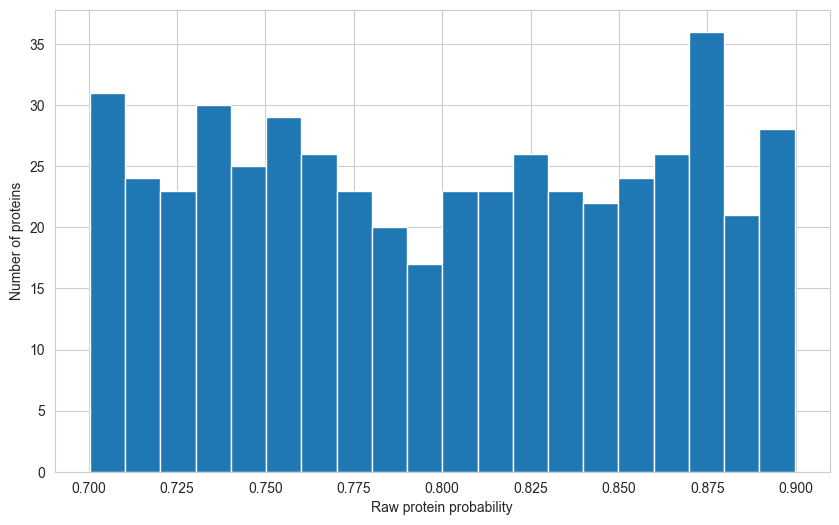

In [256]:
# plot raw_prob of unique_pred_prob
plt.figure(figsize=(10, 6))
plt.hist(positive_by_raw_prob['raw_prob'], bins=20)
plt.xlabel('Raw protein probability')
plt.ylabel('Number of proteins')
plt.show()

<Figure size 1000x600 with 0 Axes>

(array([ 2.,  1.,  5.,  7., 15., 19., 22., 26., 22., 28., 29., 26., 40.,
        29., 30., 29., 20., 36., 52., 62.]),
 array([0.37375889, 0.40005391, 0.42634892, 0.45264393, 0.47893894,
        0.50523395, 0.53152897, 0.55782398, 0.58411899, 0.610414  ,
        0.63670901, 0.66300403, 0.68929904, 0.71559405, 0.74188906,
        0.76818407, 0.79447909, 0.8207741 , 0.84706911, 0.87336412,
        0.89965913]),
 <BarContainer object of 20 artists>)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 48.,
        63., 73., 59., 53., 66., 68., 70.]),
 array([0.37375889, 0.40005391, 0.42634892, 0.45264393, 0.47893894,
        0.50523395, 0.53152897, 0.55782398, 0.58411899, 0.610414  ,
        0.63670901, 0.66300403, 0.68929904, 0.71559405, 0.74188906,
        0.76818407, 0.79447909, 0.8207741 , 0.84706911, 0.87336412,
        0.89965913]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Raw protein probability')

Text(0, 0.5, 'Number of proteins')

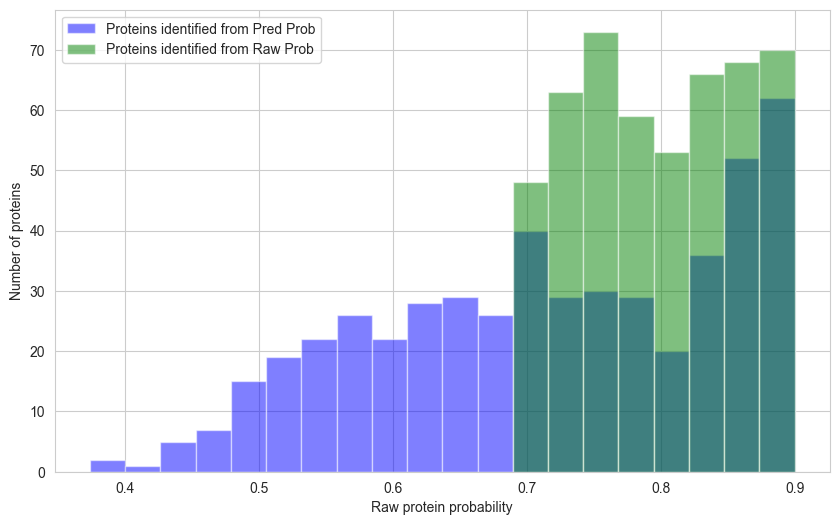

In [257]:
import numpy as np

plt.figure(figsize=(10, 6))

# Define the bin edges
bin_edges = np.linspace(min(positive_by_pred_prob['raw_prob'].min(), positive_by_raw_prob['raw_prob'].min()),
                        max(positive_by_pred_prob['raw_prob'].max(), positive_by_raw_prob['raw_prob'].max()), 21)

# Plot histogram for unique_pred_prob
plt.hist(positive_by_pred_prob['raw_prob'], bins=bin_edges, alpha=0.5, color='blue', label='Proteins identified from Pred Prob')

# Plot histogram for unique_raw_prob
plt.hist(positive_by_raw_prob['raw_prob'], bins=bin_edges, alpha=0.5, color='green', label='Proteins identified from Raw Prob')

# Add labels and legend
plt.xlabel('Raw protein probability')
plt.ylabel('Number of proteins')
plt.legend()

plt.show()

# correlation between predicted probability and mRNA expression

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'raw probability')

Text(0, 0.5, 'predicted probability')

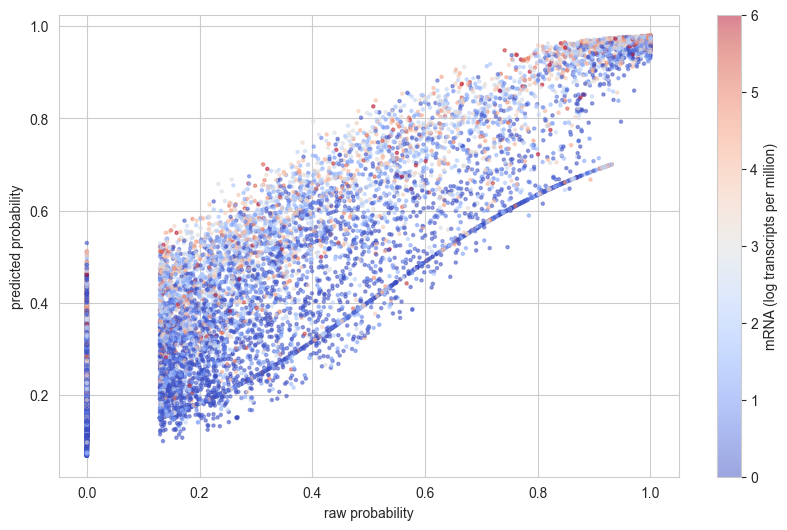

In [258]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Plot the scatter plot of degree and pred_prob and add mRNA as color
plt.figure(figsize=(10, 6))
norm = Normalize(vmin=all_proteins_df['mRNA'].min(), vmax=6)
sc = plt.scatter(all_proteins_df['raw_prob'], all_proteins_df['pred_prob'], c=all_proteins_df['mRNA'], s=5, alpha=0.5, cmap='coolwarm', norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label('mRNA (log transcripts per million)')
plt.xlabel('raw probability')
plt.ylabel('predicted probability')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 10, 'y = 2.20x + 0.79')

Text(0.5, 0, 'Predicted probability')

Text(0, 0.5, 'mRNA (log transcripts per million)')

Text(0.5, 1.0, 'Correlation between predicted protein probability and mRNA expression')

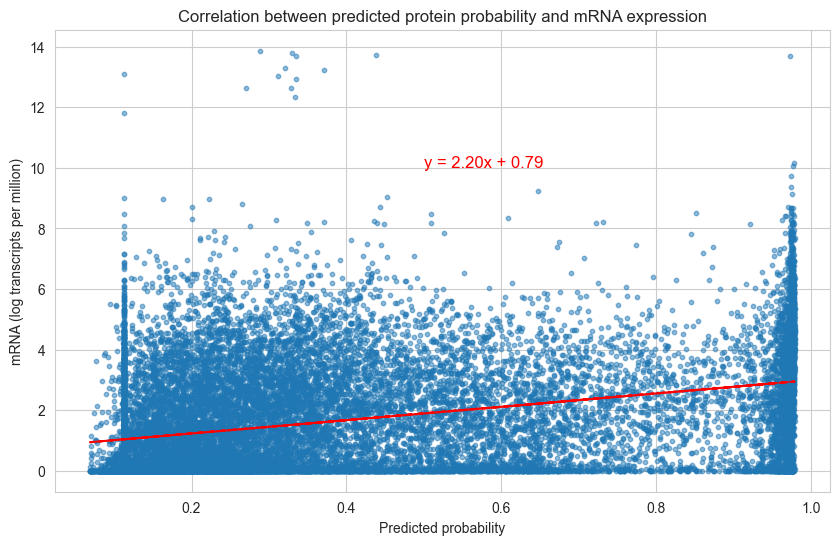

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of pred_prob and mRNA
plt.figure(figsize=(10, 6))
plt.scatter(all_proteins_df['pred_prob'], all_proteins_df['mRNA'], s=10, alpha=0.5)

# Fit a linear regression line
m, b = np.polyfit(all_proteins_df['pred_prob'], all_proteins_df['mRNA'], 1)
plt.plot(all_proteins_df['pred_prob'], m * all_proteins_df['pred_prob'] + b, color='red', linestyle='--')

# plot slope and intercept
plt.text(0.5, 10, 'y = {:.2f}x + {:.2f}'.format(m, b), fontsize=12, color='red')

# Add labels
plt.xlabel('Predicted probability')
plt.ylabel('mRNA (log transcripts per million)')

# title
plt.title('Correlation between predicted protein probability and mRNA expression')
# Show plot
plt.show()

In [260]:
# calculate spearman correlation with pred_prob and whether mRNA is larger than 0
from scipy.stats import spearmanr

# Create a binary variable indicating whether mRNA is larger than 0
all_proteins_df['mRNA_binary'] = all_proteins_df['mRNA'] > 0

# Calculate Spearman correlation
correlation, p_value = spearmanr(all_proteins_df['pred_prob'], all_proteins_df['mRNA'])

print(f'Spearman correlation: {correlation}')
print(f'P-value: {p_value}')

Spearman correlation: 0.41882320194079675
P-value: 0.0


<Figure size 1000x600 with 0 Axes>

Text(0.5, 10, 'y = 1.32x + 1.32')

Text(0.5, 0, 'Raw probability')

Text(0, 0.5, 'mRNA (log transcripts per million)')

Text(0.5, 1.0, 'Correlation between raw protein probability and mRNA expression')

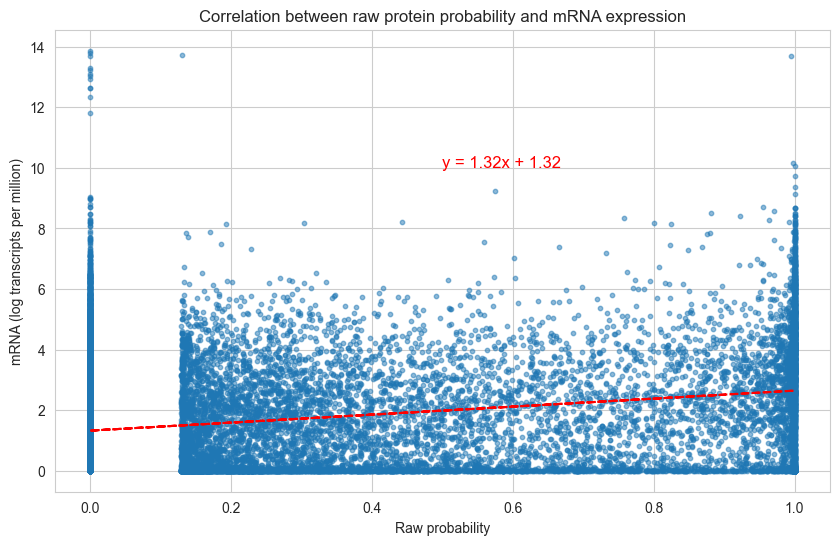

In [261]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of pred_prob and mRNA
plt.figure(figsize=(10, 6))
plt.scatter(all_proteins_df['raw_prob'], all_proteins_df['mRNA'], s=10, alpha=0.5)

# Fit a linear regression line
m, b = np.polyfit(all_proteins_df['raw_prob'], all_proteins_df['mRNA'], 1)
plt.plot(all_proteins_df['raw_prob'], m * all_proteins_df['raw_prob'] + b, color='red', linestyle='--')

# plot slope and intercept
plt.text(0.5, 10, 'y = {:.2f}x + {:.2f}'.format(m, b), fontsize=12, color='red')

# Add labels
plt.xlabel('Raw probability')
plt.ylabel('mRNA (log transcripts per million)')

# title
plt.title('Correlation between raw protein probability and mRNA expression')
# Show plot
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Predicted probability')

Text(0, 0.5, 'mRNA (log transcripts per million)')

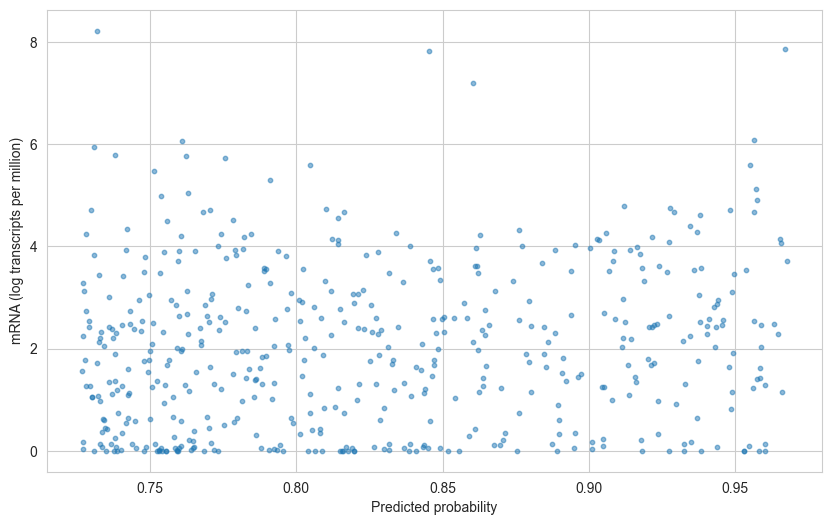

In [262]:
# scatter plot of pred_prob and mRNA
plt.figure(figsize=(10, 6))
plt.scatter(positive_by_pred_prob['pred_prob'], positive_by_pred_prob['mRNA'], s=10, alpha=0.5)
plt.xlabel('Predicted probability')
plt.ylabel('mRNA (log transcripts per million)')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Predicted probability')

Text(0, 0.5, 'mRNA (log transcripts per million)')

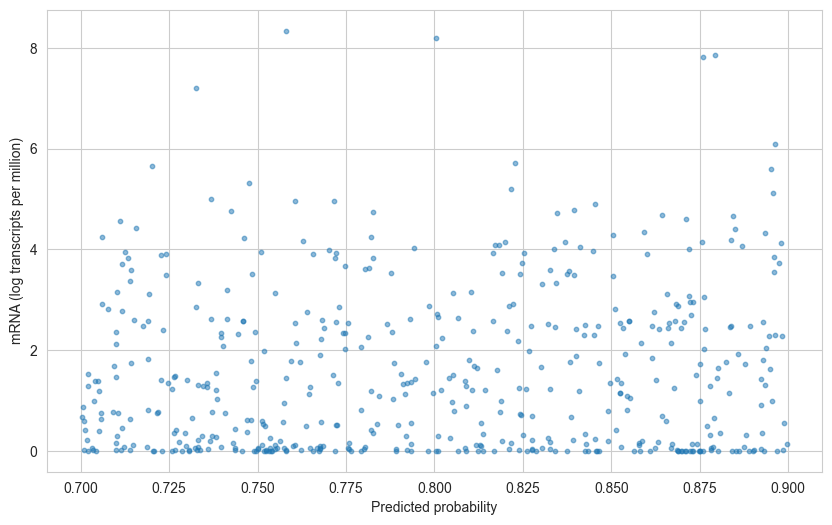

In [263]:
# scatter plot of pred_prob and mRNA
plt.figure(figsize=(10, 6))
plt.scatter(positive_by_raw_prob['raw_prob'], positive_by_raw_prob['mRNA'], s=10, alpha=0.5)
plt.xlabel('Predicted probability')
plt.ylabel('mRNA (log transcripts per million)')
plt.show()

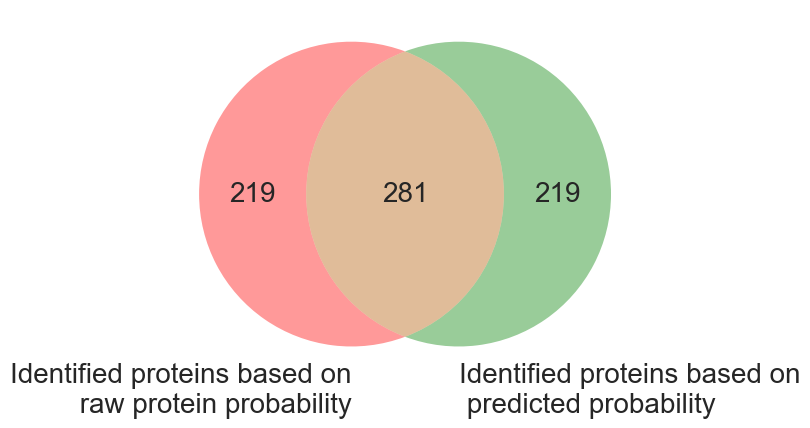

In [264]:
# venn diagram of the two sets
from matplotlib_venn import venn2
fig, ax = plt.subplots()
venn = venn2([set(positive_by_raw_prob['accession']), set(positive_by_pred_prob['accession'])], 
            set_labels=('Identified proteins based on\n raw protein probability', 
                        'Identified proteins based on\n predicted probability'), ax=ax)

# Increase font size
for text in venn.set_labels:
    text.set_fontsize(20)
for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(20)
        
ax.get_figure().savefig('/Users/cgu3/Documents/Grape-Pi/notebooks/post_training_evaluation/results/Figure 4'
                        '.tiff', format='tiff', dpi=350, bbox_inches='tight')

In [265]:
# print the accession number of those proteins in pred_prob but not in raw_prob
new_pred = set(positive_by_pred_prob['gene_symbol']) - set(positive_by_raw_prob['gene_symbol'])
# print the accession number of those proteins in raw_prob but not in pred_prob
old_raw = set(positive_by_raw_prob['gene_symbol']) - set(positive_by_pred_prob['gene_symbol'])
# create a dataframe of those proteins with pred_prob and raw_prob
new_pred_df = positive_by_pred_prob[positive_by_pred_prob['gene_symbol'].isin(new_pred)]
old_raw_df = positive_by_raw_prob[positive_by_raw_prob['gene_symbol'].isin(old_raw)]

In [266]:
# sort by ascending raw_prob and descending pred_prob
new_pred_df.sort_values(by=['raw_prob', 'pred_prob'], ascending=[True, False])

,accession,gene_symbol,pred_prob,raw_prob,soft_label,hard_label,mRNA
8987,Q9HAU5,UPF2,0.727095,0.373759,0.322839,NaN,2.252687
484,O00401,WASL,0.729274,0.387361,0.441785,NaN,2.535375
468,O00291,HIP1,0.757709,0.416036,0.658740,NaN,0.665401
3031,P46736,BRCC3,0.768850,0.439338,0.679154,NaN,2.860296
2390,P21673,SAT1,0.731896,0.442499,0.353858,NaN,8.224948
...,...,...,...,...,...,...,...
7631,Q96AX9,MIB2,0.741651,0.698044,0.541778,NaN,3.934742
506,O00488,ZNF593,0.760868,0.698720,0.343576,NaN,6.059049
5982,Q7RTP6,MICAL3,0.846988,0.698896,0.690839,NaN,1.673640
6133,Q86SQ0,PHLDB2,0.838874,0.699515,0.579301,NaN,0.126702


In [201]:
old_raw_df.sort_values(by=['raw_prob', 'pred_prob'], ascending=[False, True])
# old_raw_df.to_csv('/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/old_raw.csv')

,accession,gene_symbol,pred_prob,raw_prob,soft_label,hard_label,mRNA
4371,Q14590,ZNF235,0.707335,0.898926,0.537293,NaN,0.551588
10005,Q9UMZ3,PTPRQ,0.685990,0.898655,0.420697,NaN,0.007231
423,H3BQW9,FAM229A,0.667303,0.893568,0.331417,NaN,4.328175
54,A0A1B0GV96,CHD9NB,0.683557,0.893340,0.411276,NaN,0.000000
9711,Q9UER7,DAXX,0.681099,0.888048,0.451396,NaN,0.320081
...,...,...,...,...,...,...,...
1303,O94986,CEP152,0.674212,0.701961,0.608444,NaN,1.531068
6603,Q8N1H7,SIX6OS1,0.569872,0.701943,0.534089,NaN,0.000000
277,A6NMS7,LRRC37A,0.726771,0.701849,0.697284,NaN,0.218961
6359,Q8IV35,WDR49,0.603650,0.700795,0.478520,NaN,0.019005


In [202]:
# # read the accession to gene symbol mapping file
# acc_symbol_dict = pd.read_csv('/Users/cgu3/Documents/Grape-Pi/library/omics_metadata.csv')
# # only keep the accession and gene symbol columns
# acc_symbol_dict = acc_symbol_dict[['accession_id', 'gene_symbol']]
# # remove row if gene_symbol is NaN
# acc_symbol_dict = acc_symbol_dict[~acc_symbol_dict['gene_symbol'].isna()]
# # use acc_symbol_dict to map the accession to gene symbol
# positive_by_raw_prob = positive_by_raw_prob.merge(acc_symbol_dict, left_on='accession', right_on='accession_id', how='inner')
# positive_by_pred_prob = positive_by_pred_prob.merge(acc_symbol_dict, left_on='accession', right_on='accession_id', how='inner')

In [203]:
raw_prob_res = gp.enrichr(positive_by_raw_prob['gene_symbol'].tolist(),
           gene_sets='KEGG_2021_Human',
                          verbose=False,
                          cutoff=1,
                          outdir='/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/raw_prob')

pred_prob_res = gp.enrichr(positive_by_pred_prob['gene_symbol'].tolist(),
                           gene_sets='KEGG_2021_Human',
                           verbose=False,
                           cutoff=1,
                           outdir='/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/pred_prob')

pred_unique_res = gp.enrichr(list( set(positive_by_pred_prob['gene_symbol']) - set(positive_by_raw_prob['gene_symbol'])),
                           gene_sets='KEGG_2021_Human',
                           verbose=False,
                           cutoff=1,
                           outdir='/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/pred_unique')


/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecat

In [204]:
prediction_enriched_pathways =pd.read_table('/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/pred_prob/KEGG_2021_Human.human.enrichr.reports.txt')
# filter 'Term' with name containing "cancer"
# prediction_enriched_pathways = prediction_enriched_pathways[prediction_enriched_pathways['Term'].str.contains('cancer', case=False)]
prediction_enriched_pathways

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Autophagy,10/137,0.002362,0.323829,0,0,3.113129,18.829170,RUBCN;ATG16L2;PDPK1;EIF2AK3;BCL2;PRKCQ;PIK3R2;...
1,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,8/97,0.002985,0.323829,0,0,3.546360,20.619570,INPPL1;ASAP3;PIK3R2;ASAP1;GAB2;ASAP2;PLA2G6;PLD1
2,KEGG_2021_Human,Nucleotide excision repair,5/47,0.006187,0.374360,0,0,4.679654,23.797670,RFC1;ERCC4;POLE2;GTF2H1;ERCC6
3,KEGG_2021_Human,Inositol phosphate metabolism,6/73,0.009828,0.374360,0,0,3.522811,16.284440,INPP5B;FIG4;SYNJ1;INPPL1;PIK3C2G;SYNJ2
4,KEGG_2021_Human,p53 signaling pathway,6/73,0.009828,0.374360,0,0,3.522811,16.284440,APAF1;SERPINE1;BCL2;TNFRSF10B;MDM4;THBS1
...,...,...,...,...,...,...,...,...,...,...
212,KEGG_2021_Human,Cushing syndrome,1/155,0.980543,0.995629,0,0,0.251750,0.004947,FZD6
213,KEGG_2021_Human,Ribosome,1/158,0.981977,0.995629,0,0,0.246901,0.004491,RPL23
214,KEGG_2021_Human,Herpes simplex virus 1 infection,6/498,0.986453,0.995629,0,0,0.469241,0.006400,BST2;APAF1;EIF2AK3;BCL2;PIK3R2;IKBKE
215,KEGG_2021_Human,Cytokine-cytokine receptor interaction,1/295,0.999458,0.999832,0,0,0.130915,0.000071,TNFRSF10B


In [205]:
raw_enriched_pathways = pd.read_table('/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/raw_prob/KEGG_2021_Human.human.enrichr.reports.txt')
# filter 'Term' with name containing "cancer"
# raw_enriched_pathways = raw_enriched_pathways[raw_enriched_pathways['Term'].str.contains('cancer', case=False)]
raw_enriched_pathways

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Axon guidance,11/182,0.006125,0.996709,0,0,2.548054,12.983280,ENAH;MYL5;EPHA7;ABLIM1;ABLIM2;RYK;NFATC3;PAK6;...
1,KEGG_2021_Human,Folate biosynthesis,3/26,0.026224,0.996709,0,0,5.122195,18.650410,TH;ALPL;MOCS1
2,KEGG_2021_Human,p53 signaling pathway,5/73,0.035648,0.996709,0,0,2.892504,9.643828,SERPINE1;BCL2;TNFRSF10B;MDM4;THBS1
3,KEGG_2021_Human,Primary immunodeficiency,3/38,0.068494,0.996709,0,0,3.363940,9.018735,CIITA;RFX5;BTK
4,KEGG_2021_Human,Lysine degradation,4/63,0.072239,0.996709,0,0,2.662832,6.997316,NSD3;MECOM;NSD2;EZH2
...,...,...,...,...,...,...,...,...,...,...
200,KEGG_2021_Human,Chemical carcinogenesis,2/239,0.983467,0.996709,0,0,0.327093,0.005453,BCL2;IKBKE
201,KEGG_2021_Human,Neutrophil extracellular trap formation,1/189,0.991753,0.996709,0,0,0.206283,0.001708,HDAC9
202,KEGG_2021_Human,Prion disease,2/273,0.992214,0.996709,0,0,0.285551,0.002232,C7;EIF2AK3
203,KEGG_2021_Human,Pathogenic Escherichia coli infection,1/197,0.993276,0.996709,0,0,0.197781,0.001334,TNFRSF10B


In [206]:
unique_enriched_pathways =pd.read_table('/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/pred_unique/KEGG_2021_Human.human.enrichr.reports.txt')
# filter 'Term' with name containing "cancer"
# unique_enriched_pathways = unique_enriched_pathways[unique_enriched_pathways['Term'].str.contains('cancer', case=False)]
unique_enriched_pathways

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,6/97,0.000695,0.114453,0,0,6.095032,44.324420,PIK3R2;ASAP1;GAB2;ASAP2;PLA2G6;PLD1
1,KEGG_2021_Human,Endocytosis,9/252,0.001900,0.114453,0,0,3.445855,21.591830,NEDD4;ARAP3;SNX32;ASAP1;WASL;ASAP2;PLD1;STAM2;...
2,KEGG_2021_Human,Mismatch repair,3/23,0.001951,0.114453,0,0,13.722920,85.623590,RFC1;MSH3;PMS2
3,KEGG_2021_Human,Choline metabolism in cancer,5/98,0.004480,0.197113,0,0,4.946237,26.750090,PDPK1;PIK3R2;PLD1;DGKZ;RALGDS
4,KEGG_2021_Human,Nucleotide excision repair,3/47,0.014742,0.518918,0,0,6.230114,26.272730,RFC1;GTF2H1;ERCC6
...,...,...,...,...,...,...,...,...,...,...
171,KEGG_2021_Human,PI3K-Akt signaling pathway,2/354,0.902230,0.923212,0,0,0.508719,0.052340,PDPK1;PIK3R2
172,KEGG_2021_Human,Herpes simplex virus 1 infection,3/498,0.912614,0.927747,0,0,0.541134,0.049483,BST2;APAF1;PIK3R2
173,KEGG_2021_Human,Human cytomegalovirus infection,1/225,0.917204,0.927747,0,0,0.400496,0.034613,PIK3R2
174,KEGG_2021_Human,Coronavirus disease,1/232,0.923414,0.928691,0,0,0.388220,0.030933,PIK3R2


/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


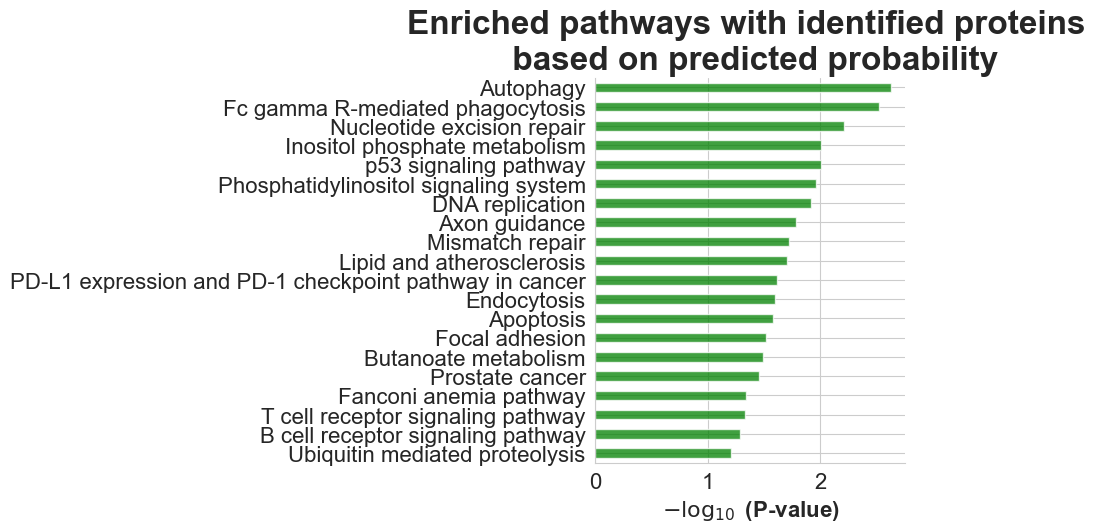

In [207]:
from gseapy import barplot
ax = barplot(prediction_enriched_pathways,
             column='P-value',
             title='Enriched pathways with identified proteins \n based on predicted probability', 
             figsize=(4, 5), color='green',
             cutoff=1, top_term=20, xtick_label_size=10, ytick_label_size=10)

fig = ax.get_figure()
# Save the figure
fig.savefig('/Users/cgu3/Documents/Grape-Pi/notebooks/post_training_evaluation/results/Figure 5a.tiff', 
            format='tiff', dpi=350,bbox_inches = 'tight')

/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


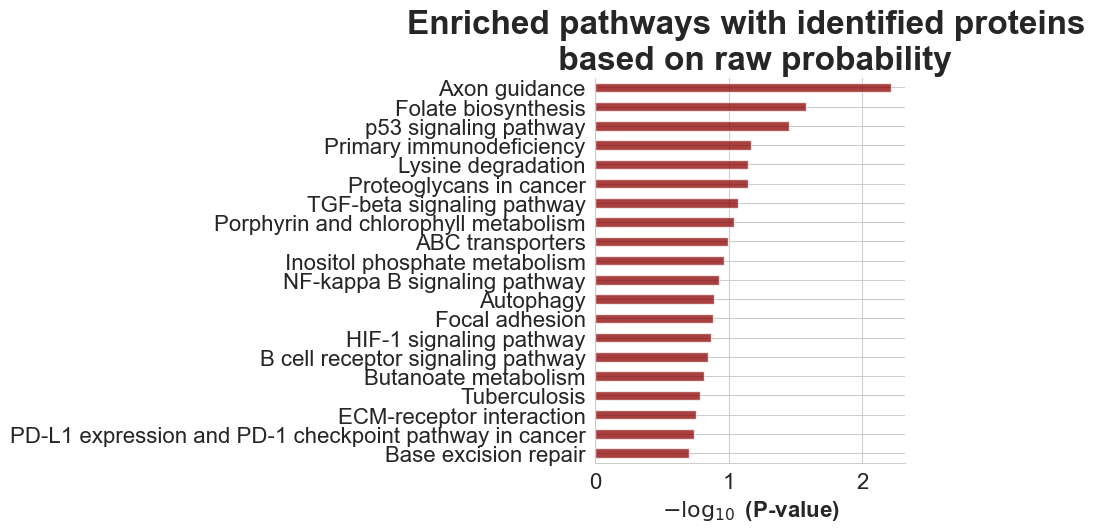

In [208]:
from gseapy import barplot
ax = barplot(raw_enriched_pathways,
             column='P-value',
             title='Enriched pathways with identified proteins \n based on raw probability', 
             figsize=(4, 5), color='darkred',
             cutoff=1, top_term=20, xtick_label_size=10, ytick_label_size=10)
fig.savefig('/Users/cgu3/Documents/Grape-Pi/notebooks/post_training_evaluation/results/Figure 5b.tiff',
            format='tiff', dpi=350,bbox_inches = 'tight')

/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


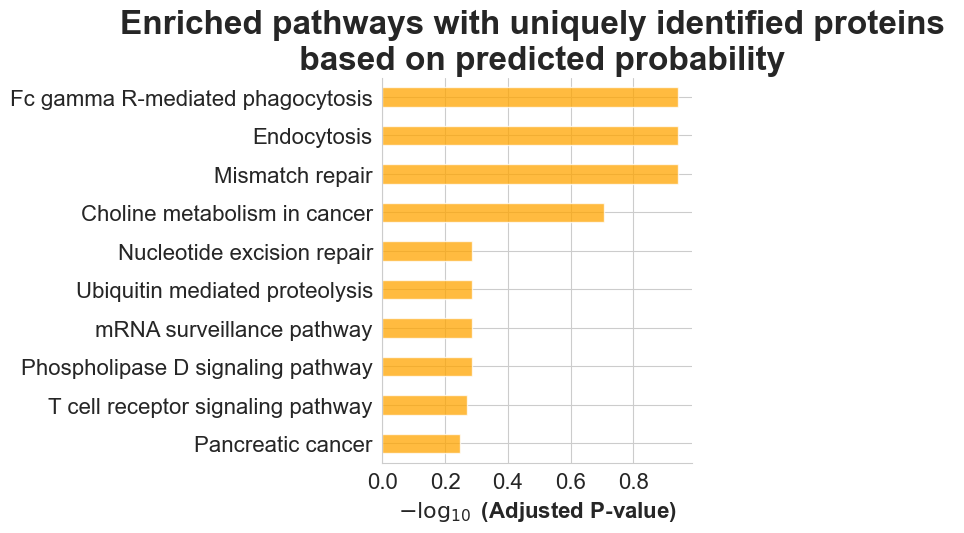

In [209]:
from gseapy import barplot
ax = barplot(unique_enriched_pathways,
             column='Adjusted P-value',
             title='Enriched pathways with uniquely identified proteins \n based on predicted probability', 
             figsize=(4, 5), color='orange',
             cutoff=1, top_term=10, xtick_label_size=10, ytick_label_size=10)

In [ ]:
net_dat = pd.read_table('/Users/cgu3/Documents/Grape-Pi/data/single/raw/interaction/9606.protein.links.v12.0-translated-filtered_400.csv', sep=',')
net_dat_100 = net_dat
all_proteins_accession = all_proteins_df['accession']
# randomly sample 10% of the proteins from all_proteins_accession
all_proteins_accession = all_proteins_accession.sample(frac=1, random_state=1)
sample_net_dat= net_dat.sample(frac=1, random_state=1)
# only keep the proteins in the all_proteins_accession
sample_net_dat = sample_net_dat [(sample_net_dat['protein1'].isin(all_proteins_accession)) & (sample_net_dat['protein2'].isin(all_proteins_accession))]

# only keep co-expression >= 0.4
net_dat = net_dat.sample(frac=1, random_state=1)
net_dat
# net_dat_400 = net_dat[net_dat['coexpression'] >= 400]
# net_dat_400
# net_dat_lt_50 = net_dat[net_dat['coexpression'] < 50]
# net_dat_lt_50

In [ ]:
all_proteins_df

In [ ]:
# use the subnet_dat to create a graph
import networkx as nx
G_1 = nx.from_pandas_edgelist(net_dat, source='protein1', target='protein2', edge_attr=True)
G_1 = G_1.to_undirected()
# visualize the graph
# be careful with the size of the graph
# nx.draw(G)
# set node attributes by the raw_prob
nx.set_node_attributes(G_1, pd.Series(all_proteins_df['raw_prob'].values, index=all_proteins_df['accession']).to_dict(), 'raw_prob')
# set node attributes by the pred_prob
nx.set_node_attributes(G_1, pd.Series(all_proteins_df['pred_prob'].values, index=all_proteins_df['accession']).to_dict(), 'pred_prob')
# add mRNA as node attribute
nx.set_node_attributes(G_1, pd.Series(all_proteins_df['mRNA'].values, index=all_proteins_df['accession']).to_dict(), 'mRNA')
nx.set_node_attributes(G_1, pd.Series(all_proteins_df['gene_symbol'].values, index=all_proteins_df['accession']).to_dict(), 'gene_symbol')

In [ ]:
# use the subnet_dat to create a graph
import networkx as nx
G_complete = nx.from_pandas_edgelist(net_dat_100, source='protein1', target='protein2', edge_attr=True)
G_complete = G_complete.to_undirected()
# visualize the graph
# be careful with the size of the graph
# nx.draw(G)
# set node attributes by the raw_prob
nx.set_node_attributes(G_complete, pd.Series(all_proteins_df['raw_prob'].values, index=all_proteins_df['accession']).to_dict(), 'raw_prob')
# set node attributes by the pred_prob
nx.set_node_attributes(G_complete, pd.Series(all_proteins_df['pred_prob'].values, index=all_proteins_df['accession']).to_dict(), 'pred_prob')
# add mRNA as node attribute
nx.set_node_attributes(G_complete, pd.Series(all_proteins_df['mRNA'].values, index=all_proteins_df['accession']).to_dict(), 'mRNA')

# merge the degree of nodes into the all_proteins_df
degree = pd.Series(dict(G_complete.degree()), name='degree')
# left merge and fill NaN with 0
all_proteins_df = all_proteins_df.merge(degree, left_on='accession', right_index=True, how='left').fillna(0)

In [ ]:
# log 2 transform the degree
all_proteins_df['degree'] = np.log2(all_proteins_df['degree'] + 1)
# only  < 0.3 or > 0.7
degree_output = all_proteins_df[(all_proteins_df['soft_label'] < 0.3) | (all_proteins_df['soft_label'] > 0.7)]
# rename the columns mRNA to mRNA_TPM
degree_output = degree_output.rename(columns={'mRNA': 'mRNA_TPM', 'accession': 'protein.Accession', 'raw_prob': 'protein_probability',} 
)
degree_output.to_csv('/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/degree_proteins_df.csv')

In [ ]:
# plot the scatter plot of degree and pred_prob and add mRNA as color
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(all_proteins_df['raw_prob'], np.log2(all_proteins_df['degree']), c=all_proteins_df['mRNA'], s=1, alpha=0.5)
# add a regression line for the scatter plot
m, b = np.polyfit(all_proteins_df['raw_prob'], np.log2(all_proteins_df['degree']), 1)
plt.plot(all_proteins_df['raw_prob'], m*all_proteins_df['raw_prob'] + b, color='red', linestyle='--')
# plot slope and intercept
plt.text(0.5, 10, 'y = {:.2f}x + {:.2f}'.format(m, b), fontsize=12, color='red')
plt.colorbar(label='mRNA (log transcripts per million)')
plt.xlabel('raw probability')
plt.ylabel('Log2 Degree')

In [ ]:
# plot the scatter plot of degree and pred_prob and add mRNA as color with size = 1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(all_proteins_df['pred_prob'], np.log2(all_proteins_df['degree']), c=all_proteins_df['mRNA'], s=1, alpha=0.5)
# add a regression line for the scatter plot
m, b = np.polyfit(all_proteins_df['pred_prob'], np.log2(all_proteins_df['degree']), 1)
plt.plot(all_proteins_df['pred_prob'], m*all_proteins_df['pred_prob'] + b, color='red', linestyle='--')
plt.text(0.5, 10, 'y = {:.2f}x + {:.2f}'.format(m, b), fontsize=12, color='red')
plt.colorbar(label='mRNA (log transcripts per million)')
plt.xlabel('Predicted probability')
plt.ylabel('Log2 Degree')
plt.show()

In [ ]:
##  use random sample of the network to visualize the graph

# Network visualization

In [ ]:
def plot_subnetwork(G, center_point, radius, node_color, edge_color='combined_score', title_fontsize=20, 
                    colorbar_label='value', colorbar_label_size=10, colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size = (10, 5), title=None, save_path=None, gene_symbol_as_label=False, **kwargs):
    g = nx.ego_graph(G, center_point, radius=radius)
    path = dict(nx.all_pairs_shortest_path_length(g))
    nodes = g.nodes()
    colors = nx.get_node_attributes(g, node_color)
    edges = g.edges()

    node_1 = [node for node in nodes if path[center_point][node] == 0 or path[center_point][node] == 1]
    node_2 = [node for node in nodes if path[center_point][node] == 2]
    colors_1 = [colors[node] for node in node_1]
    colors_2 = [colors[node] for node in node_2]
    edge_colors = [g[u][v][edge_color] for u,v in edges]

    plt.figure(figsize=figure_size)
    pos = nx.kamada_kawai_layout(g)
    ec = nx.draw_networkx_edges(g, pos,edgelist=edges, edge_color=edge_colors,  alpha=0.05)
    nc1 = nx.draw_networkx_nodes(g, pos, node_shape= 'o', node_color=colors_1, nodelist=node_1, node_size=100, cmap=plt.cm.coolwarm)
    nc2 = nx.draw_networkx_nodes(g, pos, node_shape= 'd', node_color=colors_2, nodelist=node_2, node_size=100, cmap=plt.cm.coolwarm)

    label_pos = {k: (v[0], v[1]+node_label_vertical_adjust) for k, v in pos.items()}
    if gene_symbol_as_label:
        gene_symbols = nx.get_node_attributes(g, 'gene_symbol')

        _ = nx.draw_networkx_labels(g, label_pos, labels=gene_symbols, font_size=10)
    else:
        _ = nx.draw_networkx_labels(g, label_pos, font_size=10)

    cbar = plt.colorbar(nc1,  label=colorbar_label, shrink=colorbar_shrink)
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.yaxis.label.set_size(colorbar_label_size)

    if title is None:
        title = 'Subnetwork within {} hops of protein {}'.format(radius, center_point)
    plt.title(title, fontsize=title_fontsize, fontweight='bold')

    plt.axis('off')
    plt.tight_layout()  # Add this line to reduce padding

    if save_path is not None:
        plt.savefig(save_path, format='tiff', dpi=350)
    else:
        plt.show()

## get the subnetwork of the protein with the 1st pred_prob

In [ ]:
all_proteins_df.sort_values(by=['pred_prob', 'raw_prob'],  ascending=[False, True])

In [ ]:
# largest_pred_protein = all_proteins_df.sort_values(by=['pred_prob', 'raw_prob'],  ascending=[False, True]).iloc[3, 0]
# plot_subnetwor(G_1, largest_pred_protein, 2, 'raw_prob', 'combined_score', title_fontsize=20, colorbar_label='Raw protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(30, 15), colorbar_label_size=10)
# plot_subnetwor(G_1, largest_pred_protein, 2, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Raw protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(30, 15), colorbar_label_size=10)

In [ ]:
# smallest_pred_protein = all_proteins_df.sort_values(by=['pred_prob', 'raw_prob'],  ascending=[True, False]).iloc[3, 0]
# plot_subnetwor(G_1, smallest_pred_protein, 2, 'raw_prob', 'combined_score', title_fontsize=20, colorbar_label='Raw protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(30, 15), colorbar_label_size=10)
# plot_subnetwor(G_1, smallest_pred_protein, 2, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Predicated protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(30, 15), colorbar_label_size=10)

In [ ]:
# calculate rank of the protein in the pred_prob
test_proteins_df['pre_rank'] = test_proteins_df ['pred_prob'].rank(ascending=False)
# calculate rank of the protein in the raw_prob
test_proteins_df ['raw_rank'] = test_proteins_df['raw_prob'].rank(ascending=False)

In [ ]:
test_proteins_df

# Plot the network within 2 hops of the largest positive-promoted protein 

In [ ]:
# largest pred_prob with lowest raw_prob
largest_pos_promoted = new_pred_df.sort_values(by=[ 'raw_prob', 'pred_prob',], ascending=[True, False ]).iloc[0, 0]
new_pred_df.sort_values(by=[ 'raw_prob', 'pred_prob',], ascending=[True, False ])
# sub_G_2 = nx.ego_graph(G_1, largest_pos_promoted, radius=2)
sub_G_1 = nx.ego_graph(G_1, largest_pos_promoted, radius=1)
# path = dict(nx.all_pairs_shortest_path_length(sub_G_2))
# remove the node itself
# path[largest_pos_promoted]

In [ ]:
# filter by raw_prob == 0
# should remove raw_prob = 0 since there is complete no evidence
new_pred_df[new_pred_df['raw_prob'] != 0].sort_values(by=[ 'raw_prob', 'pred_prob',], ascending=[True, False ])

In [ ]:
plot_subnetwork(G_1, 'O95819', 1, 'raw_prob',  title_fontsize=50, colorbar_label='Raw protein probability', 
               colorbar_shrink = 0.8, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=20, 
               title='', save_path='/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/Figure 6.tiff')

In [ ]:
plot_subnetwork(G_1, 'O95819', 1, 'raw_prob',  title_fontsize=50, colorbar_label='Raw protein probability',
                colorbar_shrink = 0.8, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=20, gene_symbol_as_label=True,
                title='', save_path='/Users/cgu3/Documents/Grape-Pi/notebooks/post-training-evaluation/results/Figure 6_gene.tiff')

##  sub-network within 2 hops of the largest positive-promoted protein and the color of the nodes are based on the predicted probability

In [ ]:
plot_subnetwork(G_1, 'P57772', 1, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Predicted protein'
                                                                                                   ' probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10)

In [ ]:
plot_subnetwork(G_1, 'P57772', 2, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Predicted protein'
                                                                                                   ' probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size=(30, 15), colorbar_label_size=20)

In [ ]:
# plot the subnetwork within 2 hops of the largest positive-promoted protein and the color of the nodes are based on the mRNA expression
plot_subnetwork(G_1, largest_pos_promoted, 1, 'mRNA', 'combined_score', title_fontsize=20, colorbar_label='mRNA '
                                                                                                          'expression (Log transcripts per million)', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10)

In [ ]:
# plot the subnetwork within 2 hops of the largest positive-promoted protein and the color of the nodes are based on the mRNA expression
plot_subnetwork(G_1, largest_pos_promoted, 2, 'mRNA', 'combined_score', title_fontsize=20, colorbar_label='mRNA '
                                                                                                          'expression (Log transcripts per million)', colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size=(30, 15), colorbar_label_size=20)

# Plot the network within 2 hops of the largest negative-promoted protein 

In [ ]:
# largest pred_prob with lowest raw_prob
largest_demoted = old_raw_df.sort_values(by=[ 'raw_prob', 'pred_prob'], ascending=[False, True ]).iloc[0, 0]
old_raw_df.sort_values(by=[ 'raw_prob', 'pred_prob'], ascending=[False, True ])

In [ ]:
# sub_G_2 = nx.ego_graph(G_1,largest_demoted, radius=2)
sub_G_1 = nx.ego_graph(G_1,largest_demoted, radius=1)
nx.draw(sub_G_1)
path = dict(nx.all_pairs_shortest_path_length(sub_G_2))
# remove the node itself
# path[largest_pos_promoted]

In [ ]:
plot_subnetwork(G_1, largest_demoted, 1, 'raw_prob', 'combined_score', title_fontsize=20, bcolorbar_label='Raw protein probanility', colorbar_shrink = 0.8, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10)

In [ ]:
plot_subnetwork(G_1, largest_demoted, 1, 'raw_prob', 'combined_score', title_fontsize=20, colorbar_label='Raw protein probanility', colorbar_shrink = 0.8, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10, gene_symbol_as_label=True)

In [ ]:
plot_subnetwork(G_1, largest_demoted, 2, 'raw_prob', 'combined_score', title_fontsize=20, colorbar_label='Raw protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size=(30, 15), colorbar_label_size=20)

In [ ]:
plot_subnetwor(G_1, largest_demoted, 1, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Predicted protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10)

In [ ]:
plot_subnetwor(G_1, largest_demoted, 2, 'pred_prob', 'combined_score', title_fontsize=20, colorbar_label='Predicted protein probability', colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size=(30, 15), colorbar_label_size=20)

In [ ]:
# plot the subnetwork within 2 hops of the largest positive-promoted protein and the color of the nodes are based on the mRNA expression
plot_subnetwor(G_1, largest_demoted, 1, 'mRNA', 'combined_score', title_fontsize=20, colorbar_label='mRNA expression (Log transcripts per million)', colorbar_shrink = 0.5, node_label_vertical_adjust=0.1, figure_size=(10, 5), colorbar_label_size=10)

In [ ]:
# plot the subnetwork within 2 hops of the largest positive-promoted protein and the color of the nodes are based on the mRNA expression
plot_subnetwor(G_1, largest_demoted, 2, 'mRNA', 'combined_score', title_fontsize=20, colorbar_label='mRNA expression (Log transcripts per million)', colorbar_shrink = 0.5, node_label_vertical_adjust=0.01, figure_size=(30, 15), colorbar_label_size=20)